<a href="https://colab.research.google.com/github/VeraMikhalchenko/Study/blob/main/HW10_Clasterization_Pictures_Mikhalchenko_DSU_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание к лекции «Алгоритмы кластеризации»**

**Цель:**\
Изучить применение моделей кластеризации\
**Описание задания:**\
В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

**1.Получите данные и загрузите их в рабочую среду**

In [93]:
!pip3 install scikit-image opencv-python imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import matplotlib.pyplot as plt
import cv2
import skimage 

In [95]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

In [96]:
img = cv2.imread('flowers.jpg')

In [97]:
img.shape

(466, 700, 3)

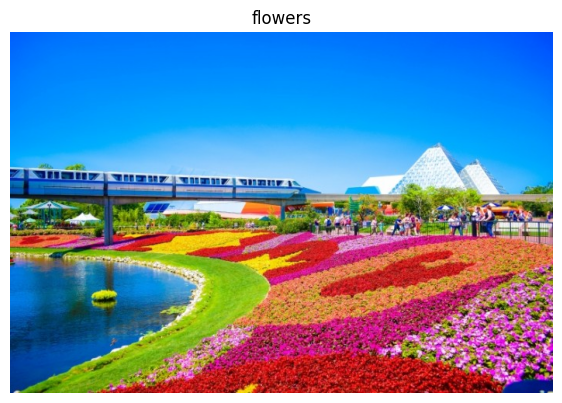

In [98]:
draw_picture(img, 'flowers', bgr=False)

**2.Реализуйте три модели кластеризации:\
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.\
b) DBSCAN\
c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.**

In [99]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import numpy as np

In [100]:
b, g, r = cv2.split(img) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
img_rgb = cv2.merge([r, g, b])

In [101]:
# Уменьшим количество измерений
img_data = img_rgb.reshape((-1,3))
# Конвертируем данные в np.float32
img_data = np.float32(img_data)

In [102]:
# Кластеризуем с помощью KMeans

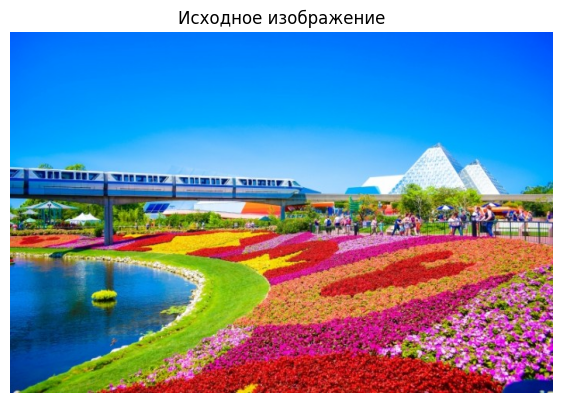

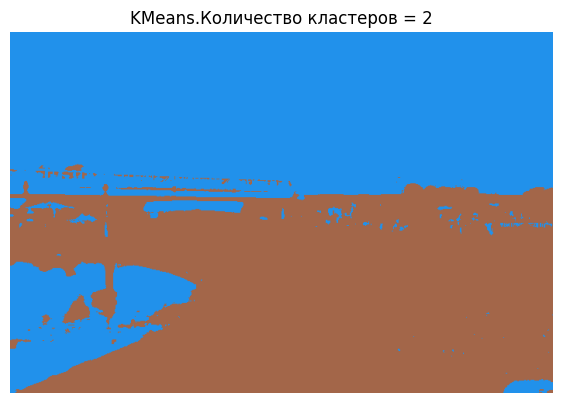

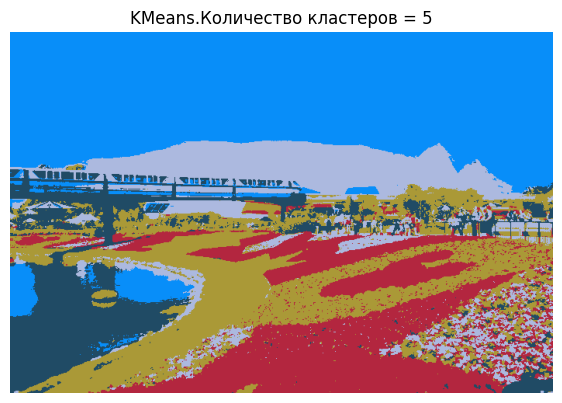

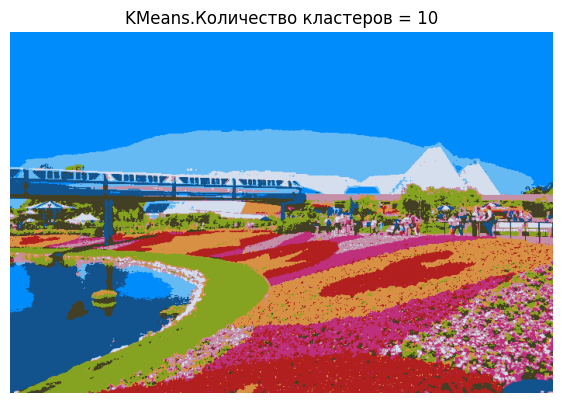

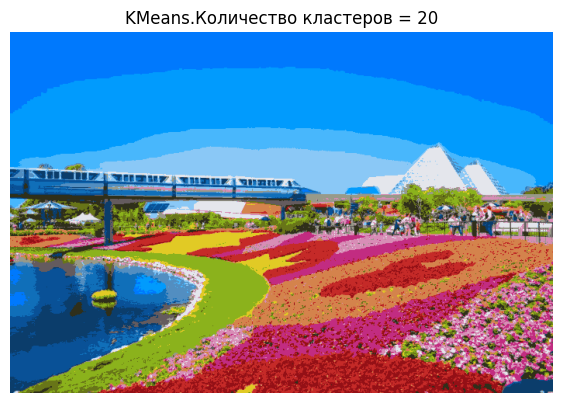

In [103]:
draw_picture(img, 'Исходное изображение', bgr = False)

# Определяем критерии завершения, количество кластеров и применяем k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k_list = [2, 5, 10, 20]

for K in k_list:
    ret, label, center = cv2.kmeans(img_data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Конвертируем данные в uint8 и рисуем изображение
    center = np.uint8(center)
    res = center[label.flatten()]
    img_clt = res.reshape((img_rgb.shape))
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(img_clt)
    plt.title(f'KMeans.Количество кластеров = {K}')
    plt.show()
  

In [104]:
# Cделаем кластеризацию с помощью DBSCAN

In [105]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clt_DBSCAN = DBSCAN()

params = {'eps':[0.001, 1],
         'min_samples':[5, 50]}

grid_search = GridSearchCV(estimator = clt_DBSCAN, param_grid = params, verbose = 1, n_jobs = -1, scoring = 'recall')
grid_search.fit(img_data)

In [107]:
clt_DBSCAN_best = grid_search.best_estimator_
clt_DBSCAN_best

DBSCAN(eps=0.001)

In [ ]:
# Нарисуем картинку

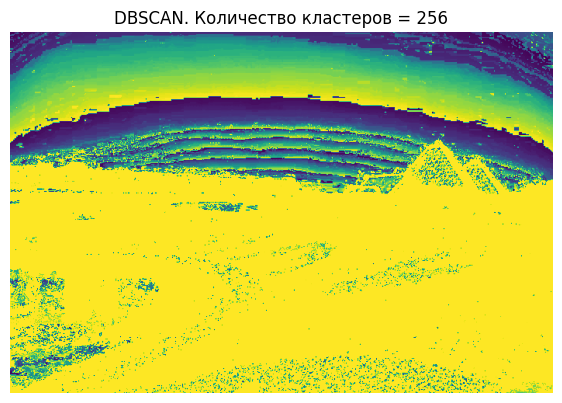

In [108]:
img_DBSCAN = clt_DBSCAN_best.fit_predict(img_data)
img_DBSCAN = np.uint8(img_DBSCAN)
DBSCAN_pic = img_DBSCAN.reshape(img_rgb[:,:,0].shape)
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.title(f'DBSCAN. Количество кластеров = {len(np.unique(img_DBSCAN))}')
plt.imshow(DBSCAN_pic)
plt.show()

In [ ]:
# Cделаем кластеризацию с помощью AgglomerativeClustering

In [109]:
from sklearn.feature_extraction import grid_to_graph

In [110]:
connectivity = grid_to_graph(*img_rgb[:,:,0].shape)

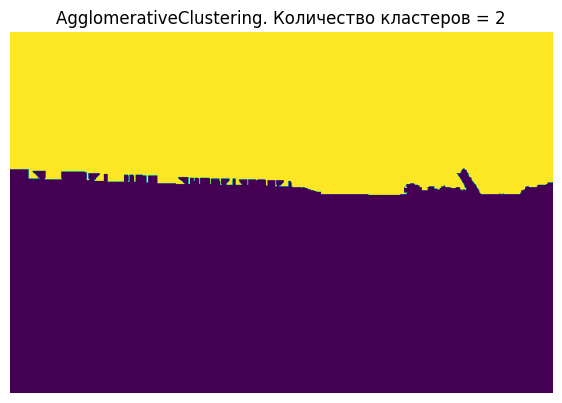

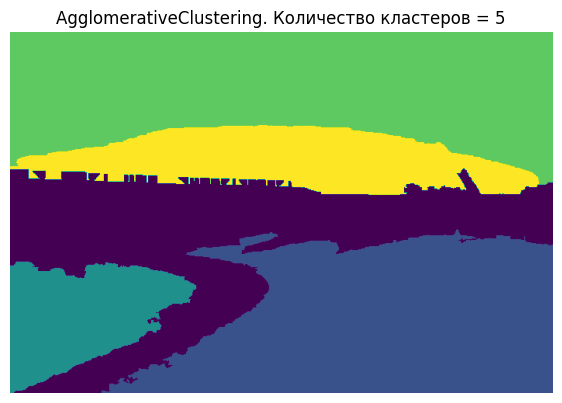

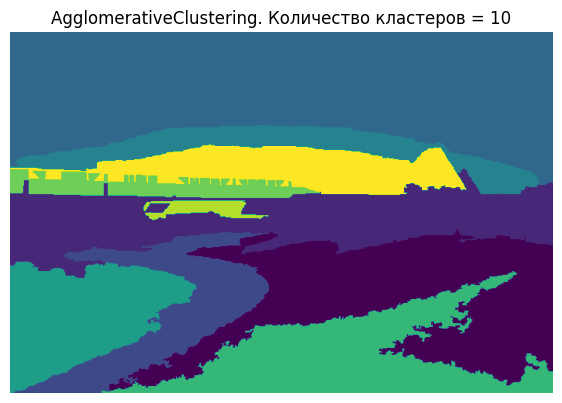

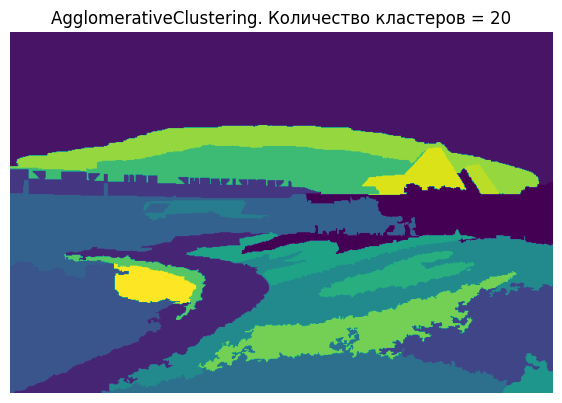

In [111]:
k_list = [2, 5, 10, 20]

for K in k_list:
    img_Agg = AgglomerativeClustering(n_clusters = K, connectivity = connectivity, 
                                      linkage = 'ward').fit_predict(img_data)
    img_Agg = np.uint8(img_Agg)
    Agg_pic = img_Agg.reshape(img_rgb[:,:,0].shape)
    plt.figure(figsize=(7, 5))    
    plt.axis('off')
    plt.imshow(Agg_pic)
    plt.title(f'AgglomerativeClustering. Количество кластеров = {K}')
    plt.show()

**3.Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM**

In [112]:
from skimage.metrics import structural_similarity as ssim


In [ ]:
# Сначала проверим, верно ли работает код, сравнив изначальное изображение с самими собой

In [113]:
ssim_none = ssim(img_rgb, img_rgb, channel_axis = 2, data_range=img_data.max() - img_data.min())
print(ssim_none)

1.0


In [ ]:
# Верно.

In [114]:
# Сравним потери от моделей

In [115]:
ssim_KMeans = ssim(img_rgb, img_clt, channel_axis = 2, data_range=img_clt.max() - img_clt.min())
print(ssim_KMeans)

0.7746775151601083


In [116]:
ssim_DBSCAN = ssim(img_rgb[:,:,0], DBSCAN_pic, data_range=img_DBSCAN.max() - img_DBSCAN.min())
print(ssim_DBSCAN)

0.04885375242954993


In [117]:
ssim_Agg = ssim(img_rgb[:,:,0], Agg_pic, data_range=img_Agg.max() - img_Agg.min())
print(ssim_Agg)

0.07909176217417681


**4.Сформулируйте выводы по проделанной работе.\
a) Какая модель показала лучший результат?**

In [118]:
import pandas as pd

In [119]:
data = {'model': ['KMeans', 'DBSCAN', 'AgglomerativeClustering'],
        'clusters': [20, len(np.unique(img_DBSCAN)), 20],
        'ssim': [round(ssim_KMeans, 3), round(ssim_DBSCAN, 3), round(ssim_Agg, 3)]} 
 
df_compare = pd.DataFrame(data)

df_compare

,model,clusters,ssim
0,KMeans,20,0.775
1,DBSCAN,256,0.049
2,AgglomerativeClustering,20,0.079


In [ ]:
# Лучше всего сработала модель KMeans, это заметно визуально.

https://machinelearningmastery.com/clustering-algorithms-with-python/ \
https://ru.wikipedia.org/wiki/SSIM \
https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html \
https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html \
https://experiencor.github.io/segmentation.html \
https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128 \
https://www.kaggle.com/code/thebrownviking20/clustering-images-w-neural-network-bayesian-opt \
https://github.com/sharmaroshan/MNIST-Using-K-means/blob/master/KMeans%20Clustering%20for%20Imagery%20Analysis%20(Jupyter%20Notebook).ipynb